# DIP Cyber Security 2: Detection and Mitigation of Social Engineering Attack 

This project aims to detect Phishing URLs represent in email such that we can mitigate the social engineering attack aspect. An analysis was conduct based on 450,176 URLs- with 345,738 legitimate and 104,438 phishing URLs. 

**Basic Libraries and Imports**

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('urldata.csv')

# Inital Analysis & Cleaning

In [4]:
df.head()

,url,label,phishing
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


Since we have phishing indicating that '0' is a legitimate URL and '1' is a phishing URL, we can remove the label column.

In [5]:
df.drop(columns = ['label'], inplace=True)

In [6]:
#Ensure that label column have been dropped
df.head()

,url,phishing
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [7]:
#Checking dataset type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       450176 non-null  object
 1   phishing  450176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [8]:
#Ensure that there is no null space
df.isnull().sum()

url         0
phishing    0
dtype: int64

In [9]:
#Ensure that there is no duplicate URLs
df[df.duplicated()]

,url,phishing


After ensuring that we have no null and duplicate URLs. we can start on our analysis

# Exploratory Data Analysis and Visualizations

With the cleaned data, we can begin exploratory data analysis and visualizations to gather more insight on the data.

In [10]:
#Basic Libraries and Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
df.head()

,url,phishing
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


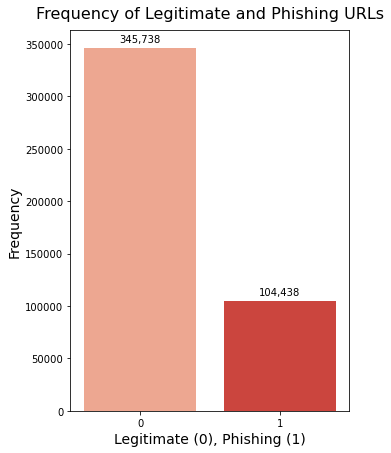

In [12]:
#Visualization of number of legitimate and phishing URLs

plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=df['phishing'], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

**Breaking down of URLs**

In [13]:
#Importing library to help us breakdown the URLs into domain,path,query and fragment  
import urllib
from urllib.parse import urlparse

In [14]:
urls = [url for url in df['url']]

In [15]:
df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [16]:
# Ensure that libaray is working 
df.head(-10)

,url,phishing,protocol,domain,path,query,fragment
0,https://www.google.com,0,https,www.google.com,,,
1,https://www.youtube.com,0,https,www.youtube.com,,,
2,https://www.facebook.com,0,https,www.facebook.com,,,
3,https://www.baidu.com,0,https,www.baidu.com,,,
4,https://www.wikipedia.org,0,https,www.wikipedia.org,,,
...,...,...,...,...,...,...,...
450161,http://facebookauthorization.whatsgratis.com/f/,1,http,facebookauthorization.whatsgratis.com,/f/,,
450162,"http://u.to/vYjNDw,Pattern",1,http,u.to,"/vYjNDw,Pattern",,
450163,https://insidethestorex.com/sd/,1,https,insidethestorex.com,/sd/,,
450164,http://youthsocialcircle.com/docs/Womsdhgdfhds...,1,http,youthsocialcircle.com,/docs/Womsdhgdfhdsghsghgltdyufyldsufidtfidsyfd...,,


**Applying Features for the URLs for analysis**

In [17]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

In [18]:
# Applying function
get_features(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 92 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   url                        450176 non-null  object
 1   phishing                   450176 non-null  int64 
 2   protocol                   450176 non-null  object
 3   domain                     450176 non-null  object
 4   path                       450176 non-null  object
 5   query                      450176 non-null  object
 6   fragment                   450176 non-null  object
 7   url_length                 450176 non-null  int64 
 8   qty_dot_url                450176 non-null  int64 
 9   qty_hyphen_url             450176 non-null  int64 
 10  qty_slash_url              450176 non-null  int64 
 11  qty_questionmark_url       450176 non-null  int64 
 12  qty_equal_url              450176 non-null  int64 
 13  qty_at_url                 450176 non-null  

In [20]:
# Randomy selecting 10 dataset to show
df_test = df.sample(n = 10, random_state = 12).copy()
df_test = df_test.reset_index(drop=True)
df_test.head(10)

,url,phishing,protocol,domain,path,query,fragment,url_length,qty_dot_url,qty_hyphen_url,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
0,https://www.archive.org/details/Bell_Telephone...,0,https,www.archive.org,/details/Bell_Telephone_Hour,,,51,2,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.yelp.ca/biz/montreal-general-hospi...,0,https,www.yelp.ca,/biz/montreal-general-hospital-montreal,,,58,2,3,...,0,0,0,0,0,0,0,0,0,0
2,http://91.239.25.28:6892,1,http,91.239.25.28:6892,,,,24,3,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.facebook.com/pages/Robert-Pinsky-A...,0,https,www.facebook.com,/pages/Robert-Pinsky-Author/183629534987305,,,67,2,2,...,0,0,0,0,0,0,0,0,0,0
4,https://www.permanentplastichelmet.com/2011/06...,0,https,www.permanentplastichelmet.com,/2011/06/10/films-that-you-probably-haven%e2%8...,,,166,2,17,...,0,0,0,0,0,0,0,0,0,0
5,http://84.19.27.254/~docswift/security.jar,1,http,84.19.27.254,/~docswift/security.jar,,,42,4,0,...,0,0,0,0,0,0,0,0,0,0
6,https://www.amazon.com/Playboy-Best-Lingerie-P...,0,https,www.amazon.com,/Playboy-Best-Lingerie-Pamela-Anderson/dp/6305...,,,74,2,4,...,0,0,0,0,0,0,0,0,0,0
7,http://dmota.org/DFP/,1,http,dmota.org,/DFP/,,,21,1,0,...,0,0,0,0,0,0,0,0,0,0
8,https://www.melodyloops.com/,0,https,www.melodyloops.com,/,,,28,2,0,...,0,0,0,0,0,0,0,0,0,0
9,https://www.123people.com/b/charles+ragland,0,https,www.123people.com,/b/charles+ragland,,,43,2,0,...,0,0,0,0,0,0,0,0,0,0


### Futher Analysis for features of URL


We now can do a futher analysis on legitimate and phishing URLs based on their features

In [21]:
num_cols = df.select_dtypes(exclude='object')

**Boxplots of different features**

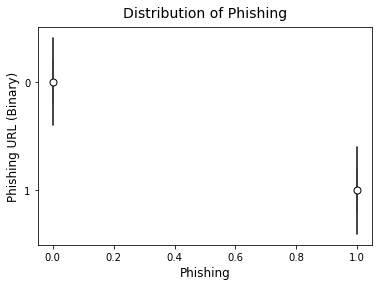

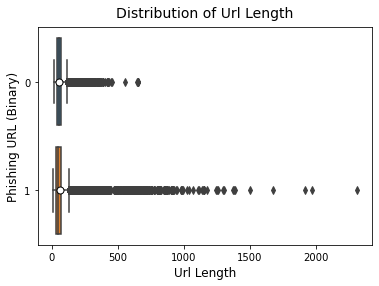

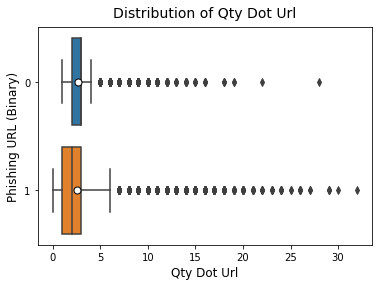

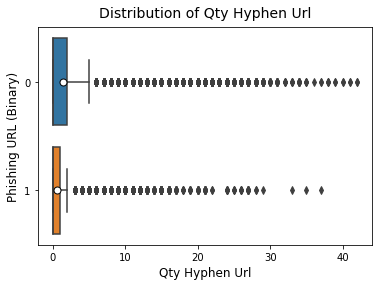

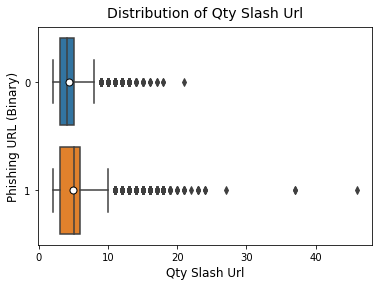

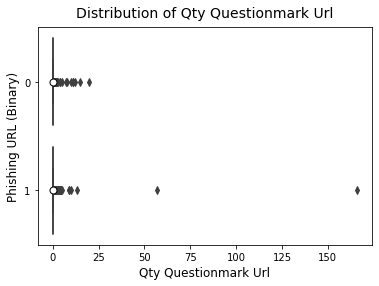

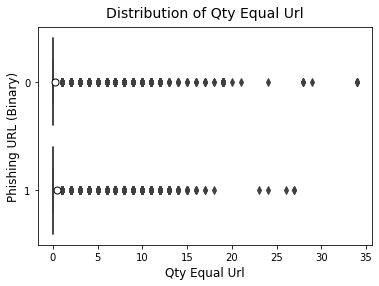

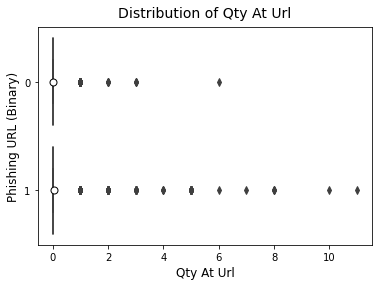

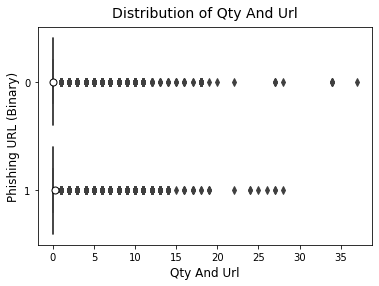

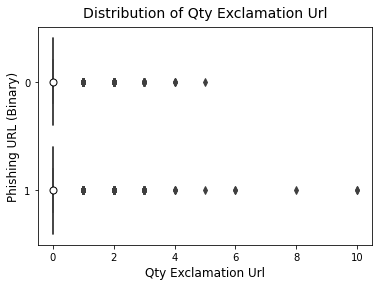

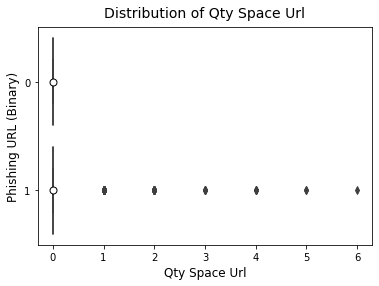

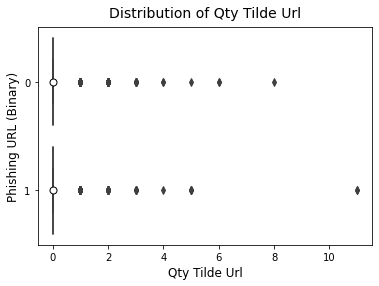

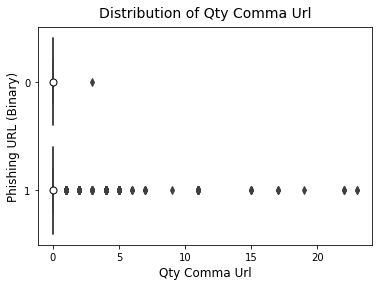

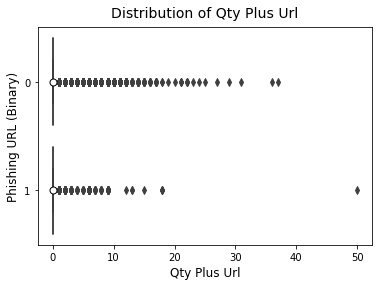

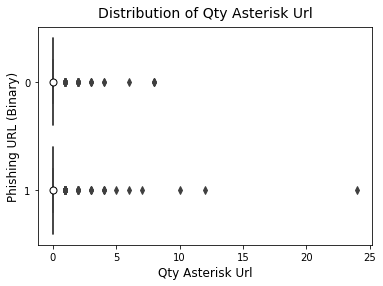

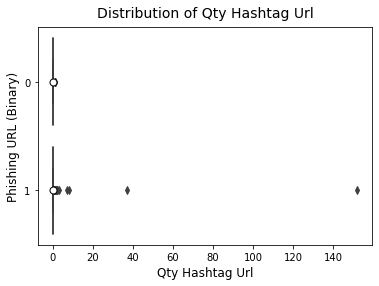

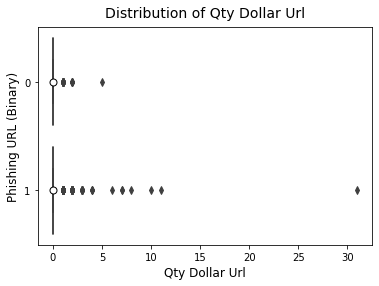

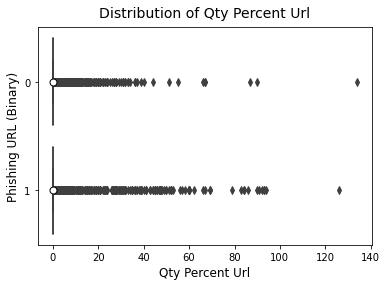

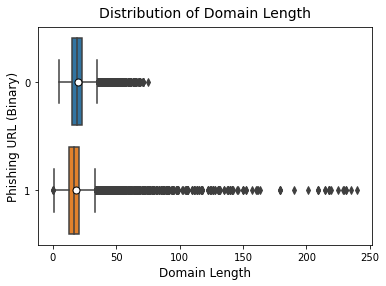

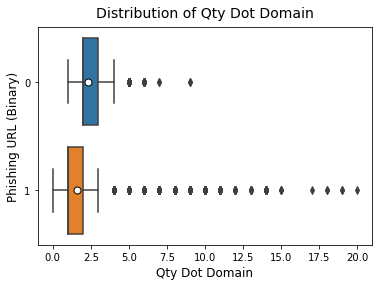

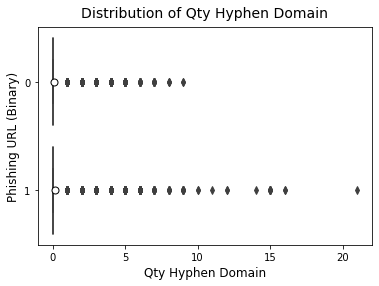

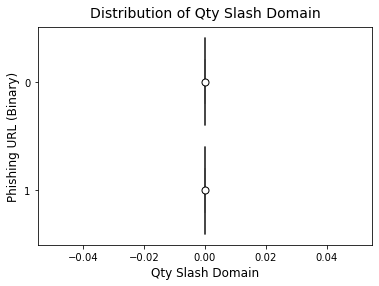

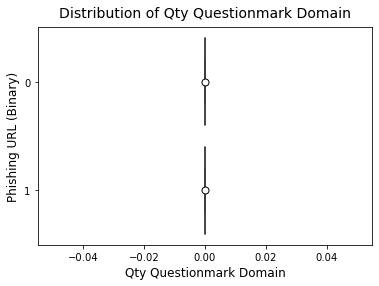

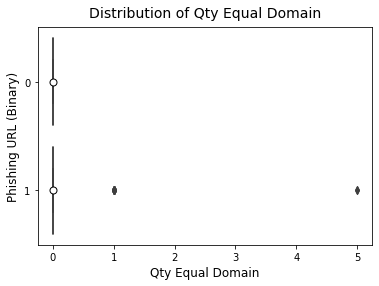

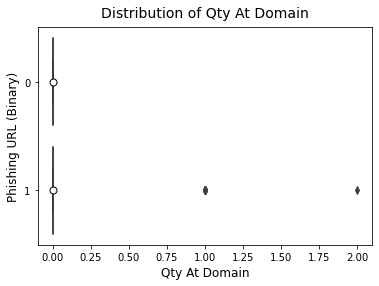

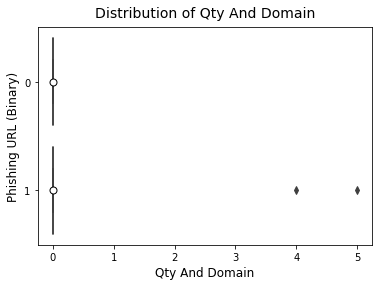

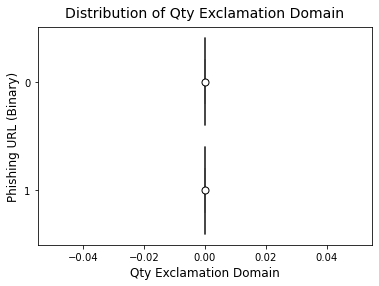

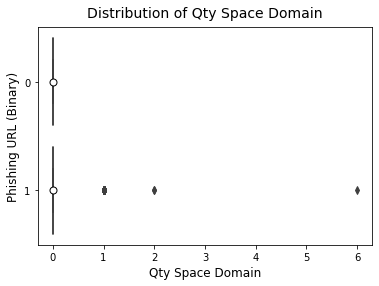

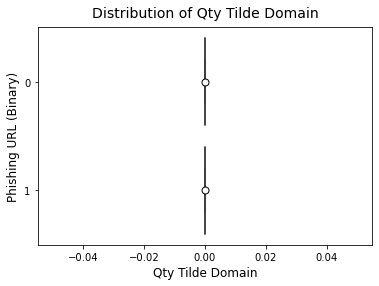

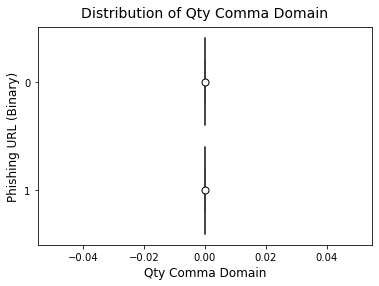

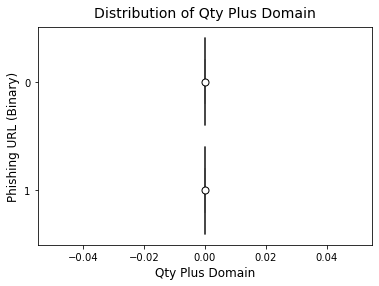

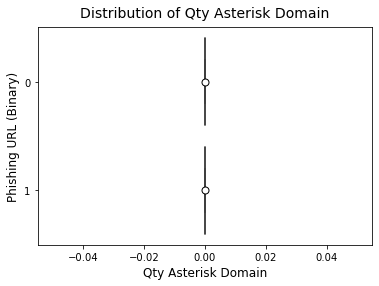

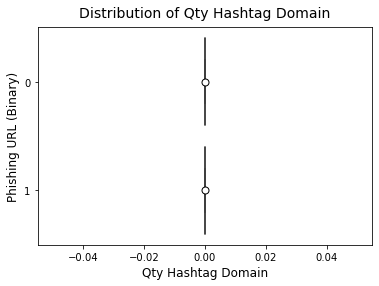

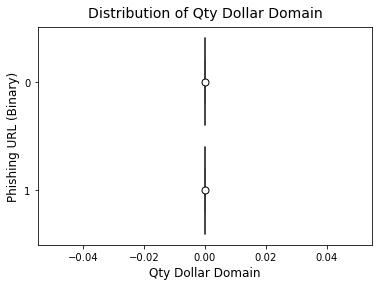

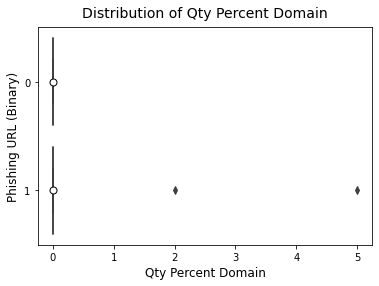

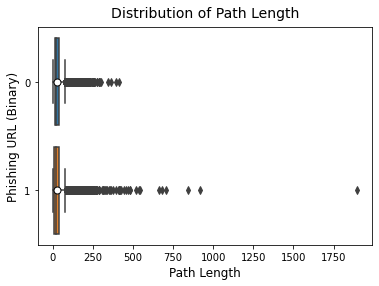

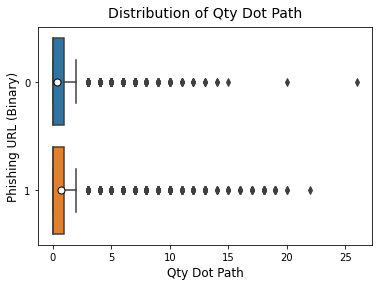

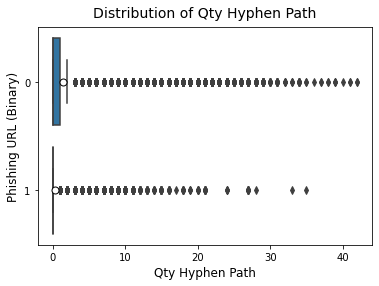

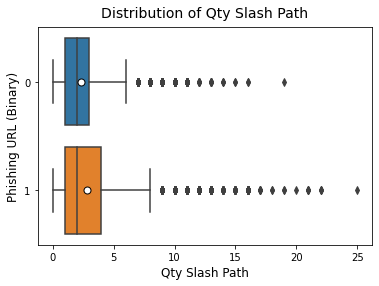

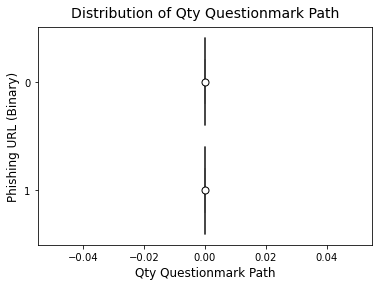

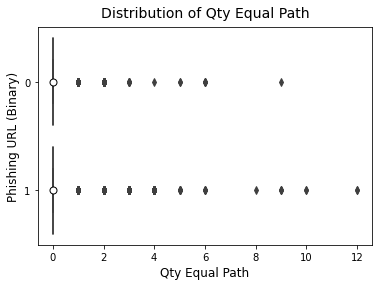

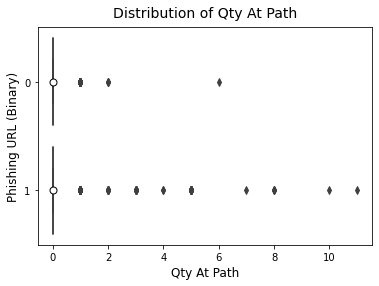

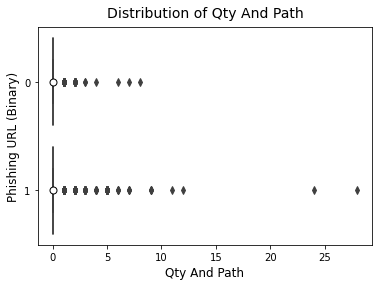

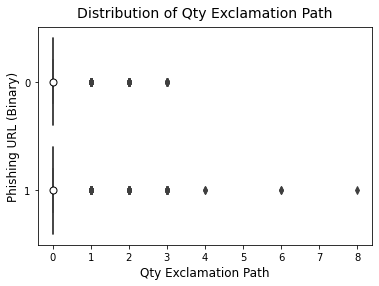

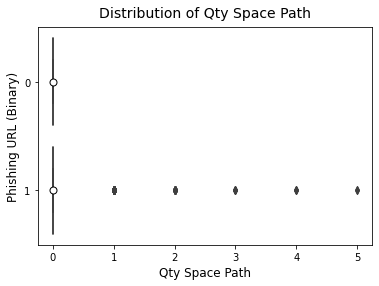

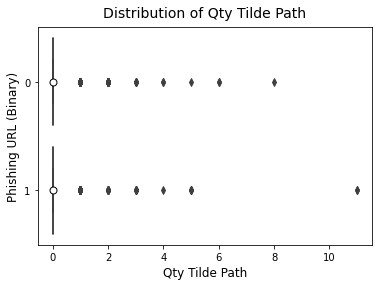

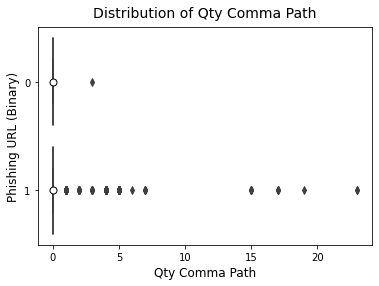

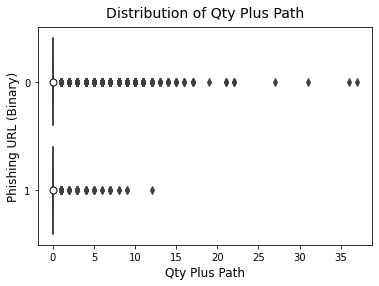

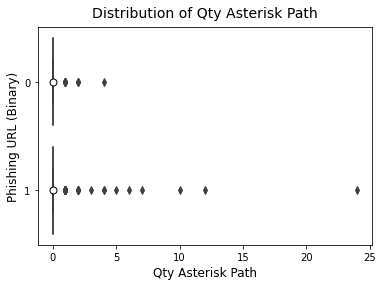

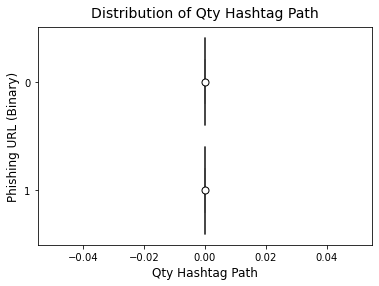

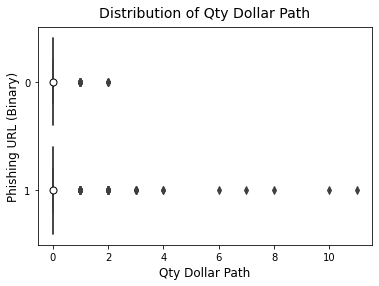

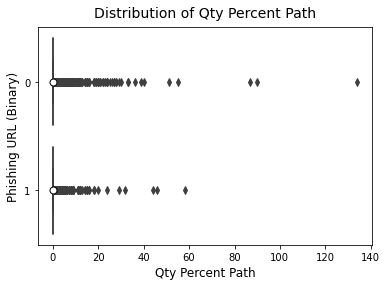

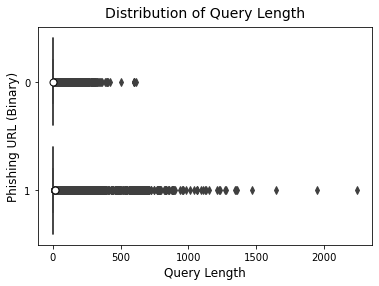

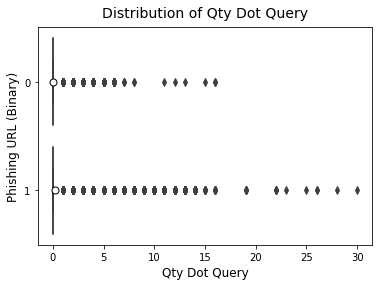

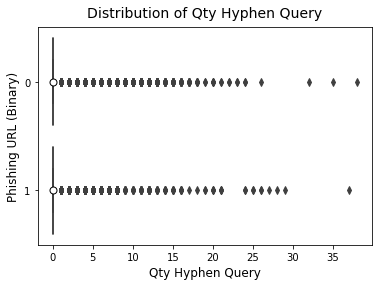

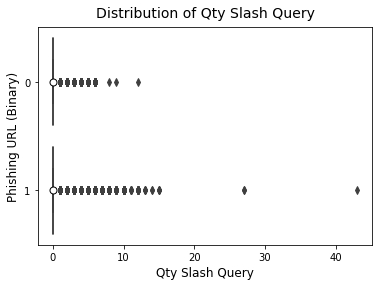

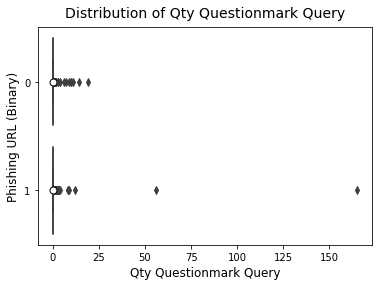

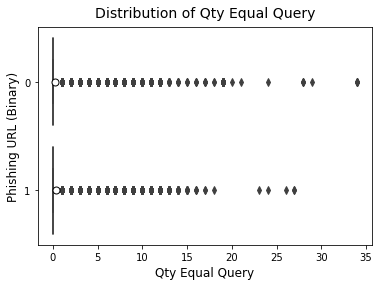

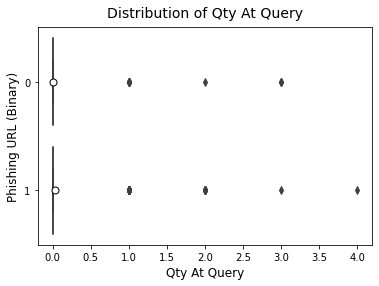

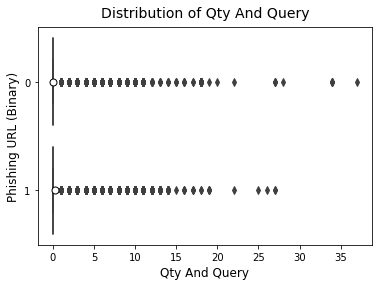

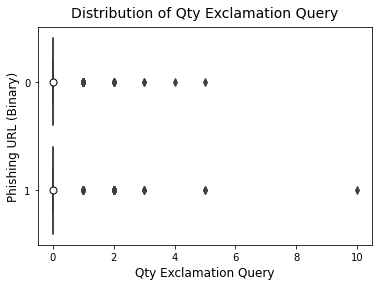

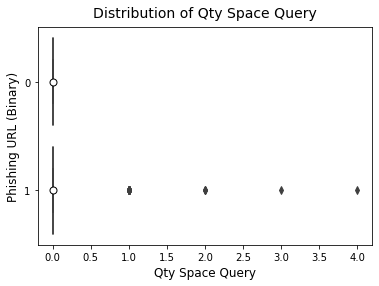

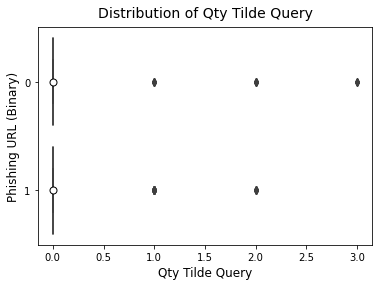

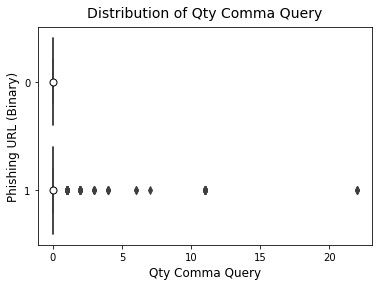

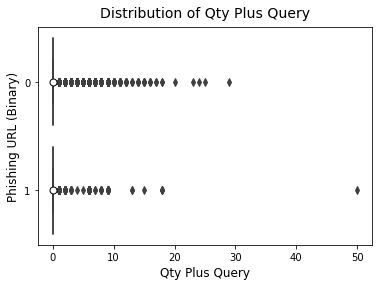

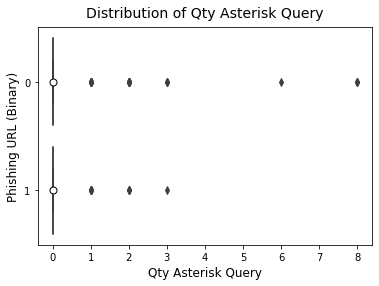

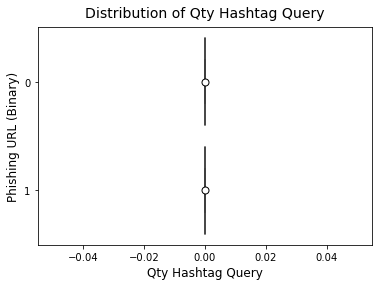

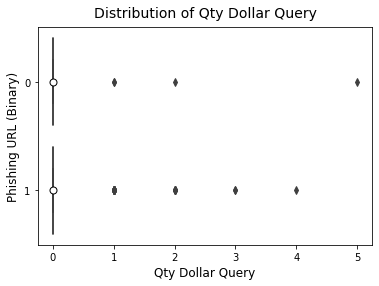

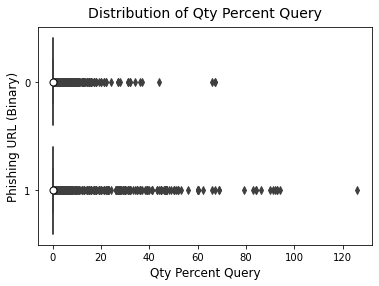

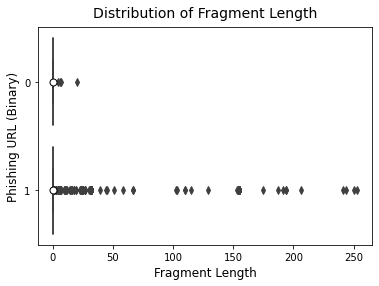

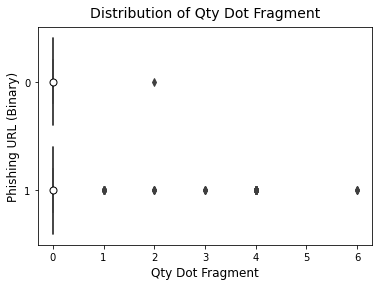

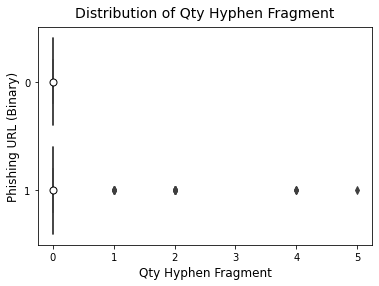

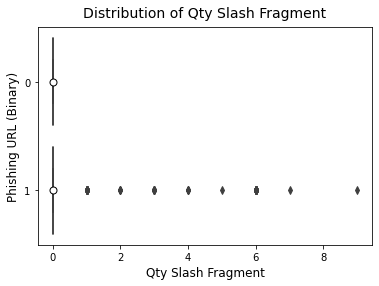

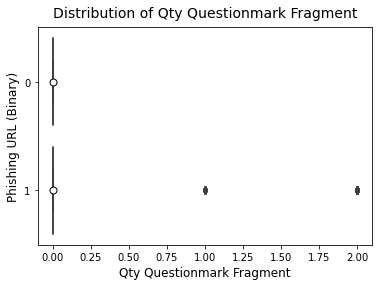

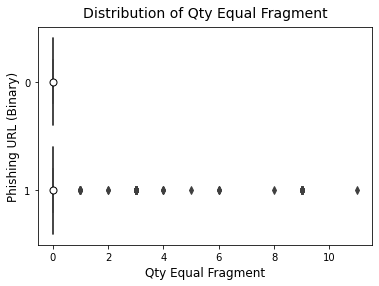

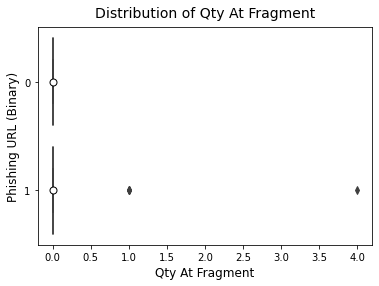

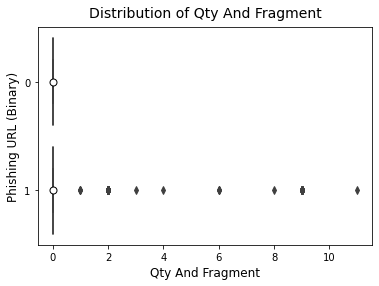

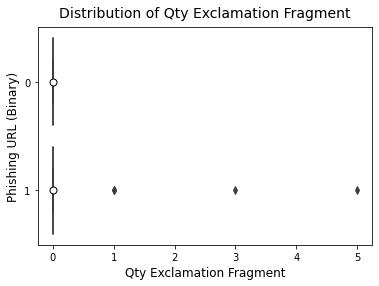

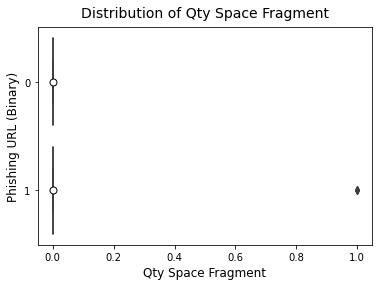

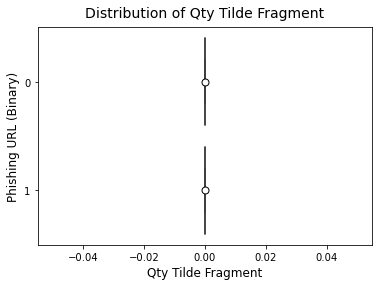

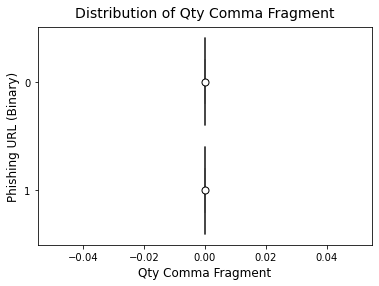

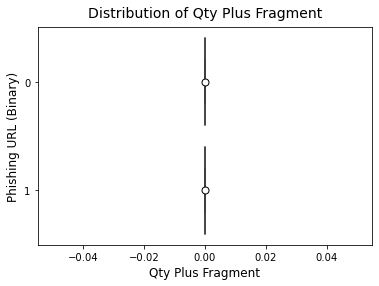

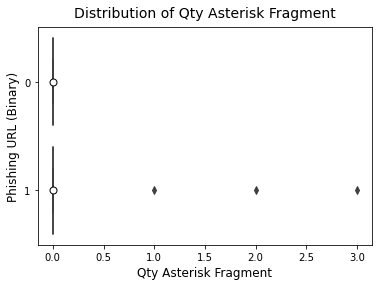

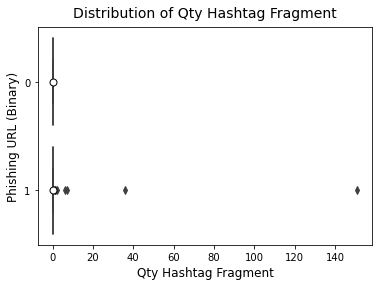

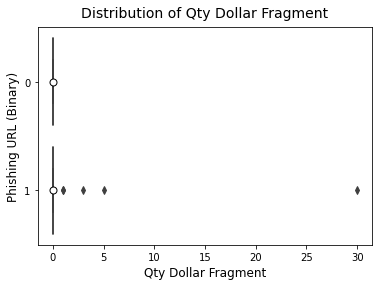

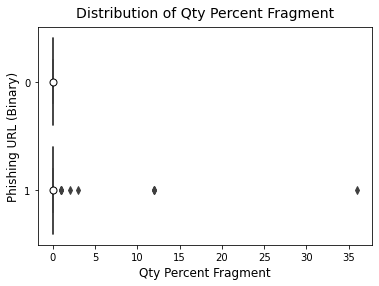

In [22]:
for col in num_cols:
    column_name = col.title().replace('_', ' ')
    title = 'Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['phishing'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"7"})
    plt.xlabel(column_name, fontsize = 12)
    plt.ylabel('Phishing URL (Binary)', fontsize = 12)
    plt.title(title, fontsize = 14, pad = 10)
    plt.show();

**Histogram for URL Length**

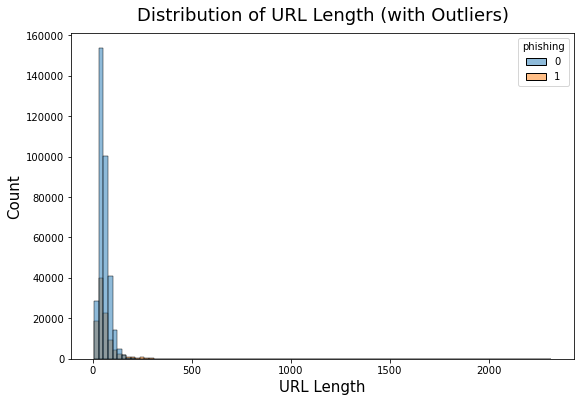

In [23]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x=df["url_length"], hue = 'phishing', bins=100)
plt.title('Distribution of URL Length (with Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

Due to the outliers the histogram is skewed. To provide a better analysis we will remove the outliers. 

In [24]:
#Removing the outliers
Q1 = df['url_length'].quantile(0.25)
Q3 = df['url_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_url_length = df[(df['url_length']> lower_bound)]
filtered_url_length = df[(df['url_length']< upper_bound)]

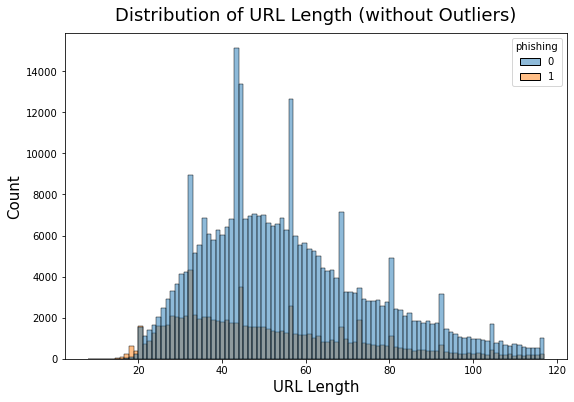

In [25]:
plt.figure(figsize=(9,6))
sns.histplot(data=filtered_url_length, x="url_length", hue = 'phishing', bins = 100)
plt.title('Distribution of URL Length (without Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

Based on the histogram we can conclude that for legitimate and phishing URLs they have smiliar URL Length.

**Heatmap of different features**

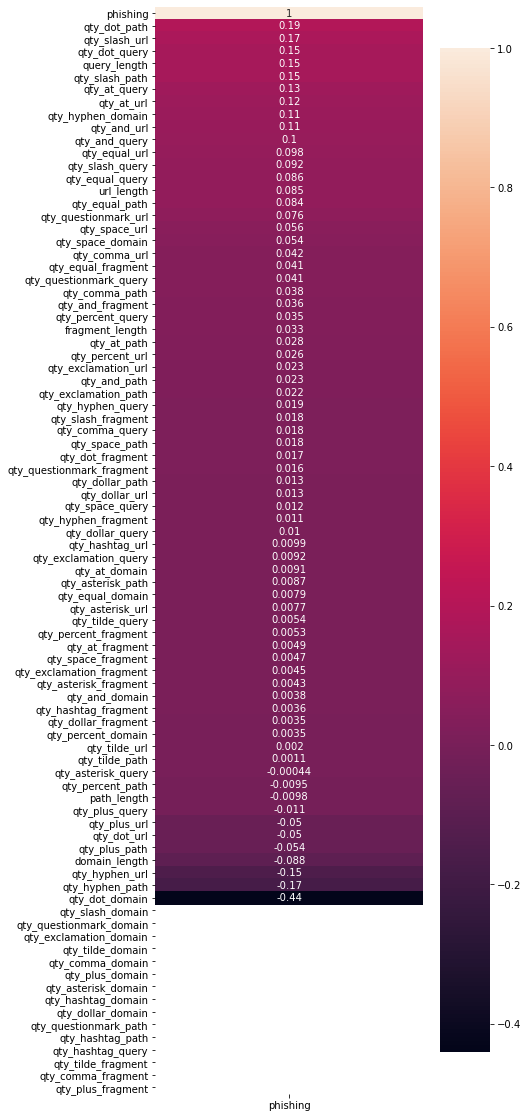

In [26]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['phishing']].sort_values('phishing', ascending=False), annot=True);

There are some features with null correlation.Hence we will explore the reason.

In [27]:
#Creating function for null correlation
col_null = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain', 
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path', 
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_comma_fragment', 'qty_plus_fragment']

In [28]:
for col in col_null:
    print(df[col].value_counts())

0    450176
Name: qty_slash_domain, dtype: int64
0    450176
Name: qty_questionmark_domain, dtype: int64
0    450161
1        13
5         2
Name: qty_equal_domain, dtype: int64
0    450164
1        11
2         1
Name: qty_at_domain, dtype: int64
0    450174
4         1
5         1
Name: qty_and_domain, dtype: int64
0    450176
Name: qty_exclamation_domain, dtype: int64
0    449753
1       420
2         2
6         1
Name: qty_space_domain, dtype: int64
0    450176
Name: qty_tilde_domain, dtype: int64
0    450176
Name: qty_comma_domain, dtype: int64
0    450176
Name: qty_plus_domain, dtype: int64
0    450176
Name: qty_asterisk_domain, dtype: int64
0    450176
Name: qty_hashtag_domain, dtype: int64
0    450176
Name: qty_dollar_domain, dtype: int64
0    450174
2         1
5         1
Name: qty_percent_domain, dtype: int64
0    450176
Name: qty_questionmark_path, dtype: int64
0    450176
Name: qty_hashtag_path, dtype: int64
0    450176
Name: qty_hashtag_query, dtype: int64
0    450171
1 

In [29]:
df.drop(columns = col_null, inplace=True)

# Model Selection

**Basic Libraries and Imports**

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [31]:
import random
random.seed(30)

In [32]:
df['phishing'].value_counts(normalize=True)

0    0.768006
1    0.231994
Name: phishing, dtype: float64

**Train test split**

In [33]:
X = df.drop(columns=['url', 'protocol', 'domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 12)

In [34]:
#Scale the data for better fitting for model 
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

We implement 2 fuctions. One for scaled while another for unscaled data

In [35]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [36]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [37]:
get_scores_sc(SGDClassifier)

SGDClassifier() Training Score: 0.9056283667462653
SGDClassifier() Testing Score: 0.9061264383135634

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     68992
           1       0.97      0.61      0.75     21044

    accuracy                           0.91     90036
   macro avg       0.93      0.80      0.85     90036
weighted avg       0.91      0.91      0.90     90036

[[68643   349]
 [ 8103 12941]]


In [38]:
get_scores(AdaBoostClassifier)


AdaBoostClassifier() Training Score: 0.9115510634753151
AdaBoostClassifier() Testing Score: 0.9118685858989738

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     68992
           1       0.95      0.66      0.78     21044

    accuracy                           0.91     90036
   macro avg       0.93      0.82      0.86     90036
weighted avg       0.92      0.91      0.91     90036

[[68274   718]
 [ 7217 13827]]


In [39]:
get_scores(GradientBoostingClassifier)

GradientBoostingClassifier() Training Score: 0.9185788859887821
GradientBoostingClassifier() Testing Score: 0.918488160291439

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     68992
           1       0.97      0.67      0.79     21044

    accuracy                           0.92     90036
   macro avg       0.94      0.83      0.87     90036
weighted avg       0.92      0.92      0.91     90036

[[68564   428]
 [ 6911 14133]]


In [40]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.9756455822735602
LogisticRegression() Testing Score: 0.975232129370474

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     68992
           1       1.00      0.90      0.94     21044

    accuracy                           0.98     90036
   macro avg       0.98      0.95      0.96     90036
weighted avg       0.98      0.98      0.97     90036

[[68914    78]
 [ 2152 18892]]


In [41]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.9952407397123341
DecisionTreeClassifier() Testing Score: 0.9641476742636279

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     68992
           1       0.94      0.91      0.92     21044

    accuracy                           0.96     90036
   macro avg       0.96      0.94      0.95     90036
weighted avg       0.96      0.96      0.96     90036

[[67748  1244]
 [ 1984 19060]]


In [42]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9952074193369246
RandomForestClassifier() Testing Score: 0.9680572215558221

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     68992
           1       0.96      0.90      0.93     21044

    accuracy                           0.97     90036
   macro avg       0.97      0.94      0.95     90036
weighted avg       0.97      0.97      0.97     90036

[[68197   795]
 [ 2081 18963]]


In [43]:
get_scores(ExtraTreesClassifier)

ExtraTreesClassifier() Training Score: 0.9952407397123341
ExtraTreesClassifier() Testing Score: 0.9654471544715447

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     68992
           1       0.95      0.90      0.92     21044

    accuracy                           0.97     90036
   macro avg       0.96      0.94      0.95     90036
weighted avg       0.97      0.97      0.97     90036

[[67958  1034]
 [ 2077 18967]]


In [44]:
get_scores(BaggingClassifier)

BaggingClassifier() Training Score: 0.992247459321375
BaggingClassifier() Testing Score: 0.9682127149140344

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     68992
           1       0.96      0.90      0.93     21044

    accuracy                           0.97     90036
   macro avg       0.97      0.94      0.95     90036
weighted avg       0.97      0.97      0.97     90036

[[68255   737]
 [ 2125 18919]]


### **Conclusion Random Forest Classifier Model**

In comparison to the other Classifer models the Random Forest Classifier model have the highest testing and recall score. Hence the Random Forest Classifer outperform the rest of the Classifer and should be use for our delpoyment for the Phishing Link.